<a href="https://colab.research.google.com/github/nastynoice/DS-MINOR-FEB./blob/main/LDA_Q5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#new


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# load dataset into Pandas DataFrame
df = pd.read_csv("/content/Real estate.csv")

df = df.drop("No",1)
print(df.columns)
df.columns = ["X1", "X2", "X3", "X4", "X5", "X6","Y"]
df

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')


,X1,X2,X3,X4,X5,X6,Y
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
mode_x1 = df["X1"].mode
mode_x1
# we see that the mode of column 1 is 2012.9 which is almost
# 2013. so, we can use 2013 as our discriminant function

<bound method Series.mode of 0      2012.917
1      2012.917
2      2013.583
3      2013.500
4      2012.833
         ...   
409    2013.000
410    2012.667
411    2013.250
412    2013.000
413    2013.500
Name: X1, Length: 414, dtype: float64>

In [ ]:
class1 = df.loc[df["X1"] < 2013,["X2", "X3", "X4", "X5", "X6"]]
class2 = df.loc[df["X1"] >= 2013,["X2", "X3", "X4", "X5", "X6"]]
# class1
# # class2

In [ ]:
# the next step is to find the mean of each feature because we
# have separated our data in 2 components
# finding mean for each feature in class 1
mean_X2 = class1["X2"].mean 
mean_X3 = class1["X3"].mean
mean_X4 = class1["X4"].mean
mean_X5 = class1["X5"].mean
mean_X6 = class1["X6"].mean
mean_all1 = np.mean(class1)
mean_all1 = np.array(mean_all1)
mean_vec1 = class1.mean
mean_vec1
# mean_all1 = [mean_X2,mean_X3,mean_X4,mean_X5,mean_X6]
mean_all1

array([  16.86666667, 1052.40416913,    4.11904762,   24.96887794,
        121.53305571])

In [ ]:
# finding mean for each feature in class 2
mean_X2n = class2["X2"].mean 
mean_X3n = class2["X3"].mean
mean_X4n = class2["X4"].mean
mean_X5n = class2["X5"].mean
mean_X6n = class2["X6"].mean
mean_all2 = np.mean(class2)
mean_all2 = np.array(mean_all2)
# mean_all2 = [mean_X2n,mean_X3n,mean_X4n,mean_X5n,mean_X6n]
# mean_all2T = mean_all2.T
mean_all2

array([  18.08263889, 1097.65885382,    4.08333333,   24.96909663,
        121.53349469])

In [ ]:
mean_lol = mean_all1 - mean_all2

In [ ]:
cov1 = class1.T@class1
cov2 = class2.T@class2

N = len(df)
N1 = len(class1)
N2 = len(class2)

cov = (N1*cov1 + N2*cov2)/N
inv_cov = np.linalg.inv(cov)

In [ ]:
# Calculating Prior Probability of Class1 and Class2
class1_Prior = N1/N
class2_Prior = N2/N

prior = np.log(class1_Prior/class2_Prior)
# mean_sub = mean_lol - mean_lmao
# mean_sub

In [ ]:
# x_t = df.drop("X1",1)
# x_t = x_t.drop("Y", 1)
# x_t = x_t.T
# x_t

In [ ]:
#a0 = prior - 0.5*mean_sub*inv_cov*mean_sub
t = inv_cov*mean_lol

In [ ]:
# x_t*inv_cov
# zipe = zip(x_t,inv_cov)
# zip(inv_cov*x_t)
# avi = np.dot(np.array(inv_cov),np.array(x_t))
# avi

In [ ]:

final_a0 = prior - 0.5*mean_lol*t
final_a0

array([[-0.82670294, -0.82664802, -0.82667857, -0.82667857, -0.82667857],
       [-0.82667855, -0.82668322, -0.82667857, -0.82667857, -0.82667857],
       [-0.82667015, -0.82775054, -0.82667908, -0.82667857, -0.82667857],
       [-0.82490538, -0.94140957, -0.82666392, -0.82667949, -0.82667782],
       [-0.82703977, -0.8030338 , -0.82668156, -0.82667839, -0.82667873]])

In [ ]:
a2 = (t[0].T)
a3 = (t[1].T)
a4 = (t[2].T)
a5 = (t[3].T)
a6 = (t[4].T)
print("a2:",a2)
print("a3:",a3)
print("a4:",a4)
print("a5:",a5)
print("a6:",a6)

a2: [-4.00852354e-05  1.35035974e-06 -4.06865971e-07  5.24539207e-07
 -2.14468997e-07]
a3: [ 3.62835349e-08 -2.05443976e-07  3.73873124e-08 -2.45032327e-08
  1.01362220e-08]
a4: [ 1.38526561e-05 -4.73746289e-05  2.84873601e-05  5.02630397e-06
 -2.05761381e-06]
a5: [ 0.0029165  -0.00507046 -0.00082083 -0.00836665  0.00345024]
a6: [-0.00059409  0.00104496  0.0001674   0.0017189  -0.00070884]


In [ ]:
# decision boundry = a0 + a2*X2 + a3*X3 + a4*X4 + a5*X5 + a6*X6

#lmao


(4, 4)
(120, 2)


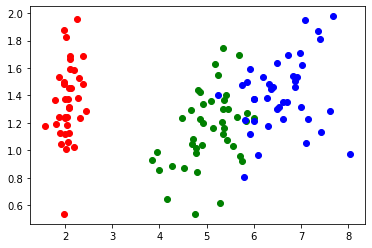

Original Data Size: (120, 4) 
Modified Data Size: (120, 2)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

class LDA:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.eig_vectors = None
    
    def transform(self,X,y):
        height, width = X.shape
        unique_classes = np.unique(y)
        num_classes = len(unique_classes)

        scatter_t = np.cov(X.T)*(height - 1)
        scatter_w = 0
        for i in range(num_classes):
            class_items = np.flatnonzero(y == unique_classes[i])
            scatter_w = scatter_w + np.cov(X[class_items].T) * (len(class_items)-1)
        
        scatter_b = scatter_t - scatter_w
        _, eig_vectors = np.linalg.eigh(np.linalg.pinv(scatter_w).dot(scatter_b))
        print(eig_vectors.shape)
        pc = X.dot(eig_vectors[:,::-1][:,:self.n_components])
        print(pc.shape)

        if self.n_components == 2:
            if y is None:
                plt.scatter(pc[:,0],pc[:,1])
            else:
                colors = ['r','g','b']
                labels = np.unique(y)
                for color, label in zip(colors, labels):
                    class_data = pc[np.flatnonzero(y==label)]
                    plt.scatter(class_data[:,0],class_data[:,1],c=color)
            plt.show()
        return pc

LDA_obj = LDA(n_components=2)
data = load_iris()
X, y = data.data, data.target
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

LDA_object = LDA(n_components=2)
X_train_modified = LDA_object.transform(X_train, Y_train)

print("Original Data Size:",X_train.shape, "\nModified Data Size:", X_train_modified.shape)